<a href="https://colab.research.google.com/github/mishba-ai/Learning-ML/blob/main/Word_Similarity_and_Analogies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chat.deepseek.com/a/chat/s/da893fe2-8183-4976-bdd5-a6963987a1d2

questions :
- how the vectors of words calculate??
- how to create embeddings

In [1]:
import torch
import matplotlib as plt
import numpy as np
import pandas as pd

# using glove
Uses a word-context matrix to represent the likelihood of a word appearing near another word


In [2]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip the file
!unzip glove.6B.zip

--2025-01-28 13:17:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-28 13:17:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-28 13:17:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
# Load the embeddings
glove_path = "glove.6B.50d.txt"  # Use the 50-dimensional file
embeddings_dict = {}  #  Words will be the keys, and their corresponding vector representations will be the values.
with open(glove_path, 'r', encoding='utf-8') as f:
  # Processing Each Line
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32') #This creates the vector representation of the word.
        embeddings_dict[word] = vector

print(f"Loaded {len(embeddings_dict)} word vectors.")

Loaded 400000 word vectors.


# Use the Embeddings

## Find Similar Words


In [4]:
from sklearn.metrics.pairwise import cosine_similarity #this function will be used to calculate the similarity between word vectors.

def find_similar_words(word, top_n=5):
    if word not in embeddings_dict:
        return f"'{word}' not in vocabulary."

    # Get the vector for the input word
    word_vector = embeddings_dict[word].reshape(1, -1) #reshape is used to ensure the vector has the correct shape for the cosine_similarity function.

    # Compute cosine similarity with all other words
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():
        if other_word == word:
            continue
        sim = cosine_similarity(word_vector, other_vector.reshape(1, -1))[0][0]
        similarities[other_word] = sim

    # Sort by similarity and return the top N words
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Example usage
word = "king"
similar_words = find_similar_words(word)
print(f"Words similar to '{word}': {similar_words}")

Words similar to 'king': [('prince', 0.823618), ('queen', 0.7839043), ('ii', 0.77462304), ('emperor', 0.77362484), ('son', 0.76671946)]


## Visualize Embeddings







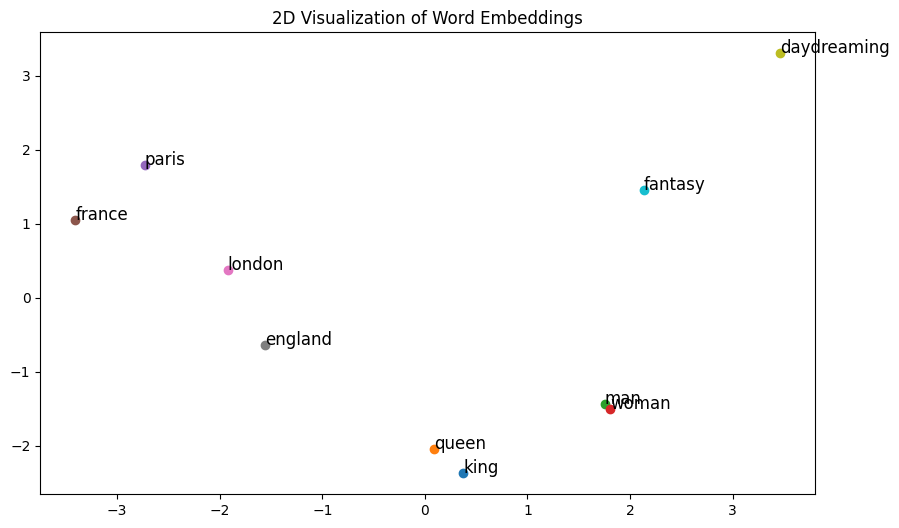

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a few words to visualize
words_to_visualize = ["king", "queen", "man", "woman", "paris", "france", "london", "england","daydreaming","fantasy"]
vectors = [embeddings_dict[word] for word in words_to_visualize]

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the words
plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=12)
plt.title("2D Visualization of Word Embeddings")
plt.show()